In [1]:
import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def load_arff_file(
    filename: str, 
    custom_columns: list[str] = None
) -> pd.DataFrame:
    """
    Loads an ARFF file using the liac-arff library, returning a Pandas DataFrame.
    If custom_columns is provided, those will override the attribute names in the file.
    """
    # Parse the .arff file
    data_arff = arff.load(open(filename, 'r'))
    
    # data_arff is a dictionary with keys: 'description', 'relation', 'attributes', 'data'
    records = data_arff['data']           # the raw data rows
    attributes = data_arff['attributes']  # list of (name, type) tuples
    
    if custom_columns is None:
        # Use the attribute names from the file
        column_names = [attr[0] for attr in attributes]
    else:
        # Use the user-provided column list
        column_names = custom_columns
    
    df = pd.DataFrame(records, columns=column_names)
    return df

In [3]:
freq_cols = [
    "IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
    "VehAge", "DrivAge", "BonusMalus", "VehBrand",
    "VehGas", "Density", "Region"
]

df_freq = load_arff_file("Data/freMTPL2freq.arff", custom_columns=freq_cols)

In [4]:
print("Frequency dataset:")
print(df_freq.head())
print(df_freq.info(), "\n")

Frequency dataset:
   IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0    1.0      1.0      0.10    D       5.0     0.0     55.0        50.0   
1    3.0      1.0      0.77    D       5.0     0.0     55.0        50.0   
2    5.0      1.0      0.75    B       6.0     2.0     52.0        50.0   
3   10.0      1.0      0.09    B       7.0     0.0     46.0        50.0   
4   11.0      1.0      0.84    B       7.0     0.0     46.0        50.0   

  VehBrand   VehGas  Density Region  
0      B12  Regular   1217.0    R82  
1      B12  Regular   1217.0    R82  
2      B12   Diesel     54.0    R22  
3      B12   Diesel     76.0    R72  
4      B12   Diesel     76.0    R72  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013

In [6]:
sev_cols = ["IDpol", "ClaimAmount"]

df_sev = load_arff_file("Data/freMTPL2sev.arff", custom_columns=sev_cols)


In [7]:
print("Severity dataset:")
print(df_sev.head())
print(df_sev.info(), "\n")

Severity dataset:
       IDpol  ClaimAmount
0     1552.0       995.20
1  1010996.0      1128.12
2  4024277.0      1851.11
3  4007252.0      1204.00
4  4046424.0      1204.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB
None 



In [8]:
print("Frequency dataset shape:", df_freq.shape)
print("Severity dataset shape:", df_sev.shape)


Frequency dataset shape: (678013, 12)
Severity dataset shape: (26639, 2)


## Inspect Missing Values


In [9]:
print(df_freq.isnull().sum())
print(df_sev.isnull().sum())


IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64
IDpol          0
ClaimAmount    0
dtype: int64


##### No missing values allows us to proceed with the investigation of the data

## Basic Descriptive Statistics


In [10]:
df_freq.describe()



,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


ClaimNb having a mean of 0.05 indicates that most insurance holders will not submit a claim - which makes sense 
Exposure being 0.5 implies that many policies might nor be held for full 12 months implying a variety of coverage length

For ClaimNB, BonusMalus and Density the median is larger than the mean -> left skew

For Exposures, VehPower, DriveAge, VehAge the mean and median are about the same

For Claim Amount the mean is much larger than the median -> right skew

In [11]:
df_sev.describe()

,IDpol,ClaimAmount
count,2.663900e+04,2.663900e+04
mean,2.279864e+06,2.278536e+03
std,1.577202e+06,2.929748e+04
min,1.390000e+02,1.000000e+00
25%,1.087642e+06,6.868100e+02
50%,2.137413e+06,1.172000e+03
75%,3.180162e+06,1.228080e+03
max,6.113971e+06,4.075401e+06


In [12]:
def freedman_diaconis_bins(series):
    """
    Compute the number of histogram bins using the Freedman–Diaconis rule:
    
    bin_width = 2 * IQR(series) / (n^(1/3))
    number_of_bins = (max(series) - min(series)) / bin_width
    
    If the IQR is zero (e.g., when data is all the same), 
    fall back to a simple default like 10 bins.
    """
    x = series.dropna()
    if len(x) < 2:
        return 1
    
    q25, q75 = np.percentile(x, [25, 75])
    iqr = q75 - q25
    n = len(x)
    
    if iqr == 0:
        return 10
    
    bin_width = 2 * iqr / (n ** (1/3))
    data_range = x.max() - x.min()
    
    if bin_width == 0:
        return 10
    
    return max(int(np.ceil(data_range / bin_width)), 1)

In [13]:
def plot_histograms_freedman_diaconis(
    df, columns, clip_upper_quantile=None
):
    """
    Plots the distribution of each column in `columns`.
    Numeric columns:
        - Freedman–Diaconis bins
        - (Optionally) clipped to a chosen upper quantile
    Non-numeric columns:
        - Bar charts of value counts
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataframe containing your data.
    columns : list of str
        The columns you want to plot.
    clip_upper_quantile : float or None
        If not None, clip data above this quantile (e.g. 0.99) 
        to improve visualization of highly skewed data.
    """
    for col in columns:
        plt.figure()

        # Numeric columns: Freedman-Diaconis histogram
        if pd.api.types.is_numeric_dtype(df[col]):
            x = df[col].dropna()

            # Optionally clip the high end to the chosen quantile
            if clip_upper_quantile is not None:
                upper_cutoff = x.quantile(clip_upper_quantile)
                x = x[x <= upper_cutoff]

            # Determine bins via Freedman–Diaconis
            n_bins = freedman_diaconis_bins(x)

            # Plot
            plt.hist(x, bins=n_bins)
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')

        # Categorical columns: Bar chart of value counts
        else:
            df[col].value_counts().plot(kind='bar')
            plt.title(f'Bar chart of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')

        # Save the figure
        filename = f"{col}_histogram.png"
        plt.tight_layout()
        plt.savefig(filename)
        plt.close()
        print(f"✅ Saved: {filename}")


In [14]:
freq_numeric_cols = [
    "ClaimNb", "Exposure", "VehPower", "VehAge", "DrivAge", 
    "BonusMalus", "Density"
]

# Numerical: ClaimNb", "Exposure", "VehPower","VehAge", "DrivAge", "BonusMalus", "Density" 
# Categorical: "Area", "VehBrand","VehGas","Region"


sev_numeric_cols = ["ClaimAmount"]

In [15]:
plot_histograms_freedman_diaconis(df_freq, freq_numeric_cols, clip_upper_quantile=0.99)

✅ Saved: ClaimNb_histogram.png
✅ Saved: Exposure_histogram.png
✅ Saved: VehPower_histogram.png
✅ Saved: VehAge_histogram.png
✅ Saved: DrivAge_histogram.png
✅ Saved: BonusMalus_histogram.png
✅ Saved: Density_histogram.png


In [16]:
import matplotlib.pyplot as plt

def plot_categorical_bars(df, categorical_cols):
    """
    Plots bar charts for each column in `categorical_cols`.
    - Each chart shows the value counts of that column.
    - Bars are displayed in descending order of frequency.
    - Each plot is saved as an image (PNG) to the current directory.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing your data.
    categorical_cols : list of str
        Names of the columns that should be treated as categorical.
    """
    for col in categorical_cols:
        # Get value counts, sorted descending
        vc = df[col].value_counts()

        # Create a new figure for each column
        plt.figure()

        # Plot bar chart
        vc.plot(kind='bar')

        # Customize titles and labels
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Save the plot as a PNG file
        filename = f"{col}_bar_chart.png"
        plt.tight_layout()
        plt.savefig(filename)
        print(f"✅ Saved bar chart to: {filename}")

        # Show the plot
        plt.show()


✅ Saved bar chart to: Area_bar_chart.png


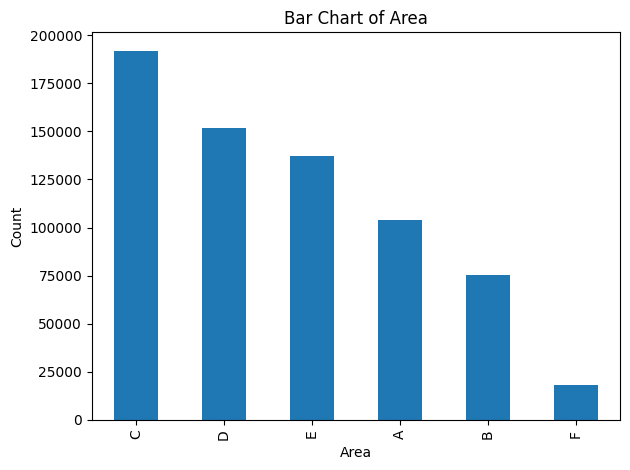

✅ Saved bar chart to: VehBrand_bar_chart.png


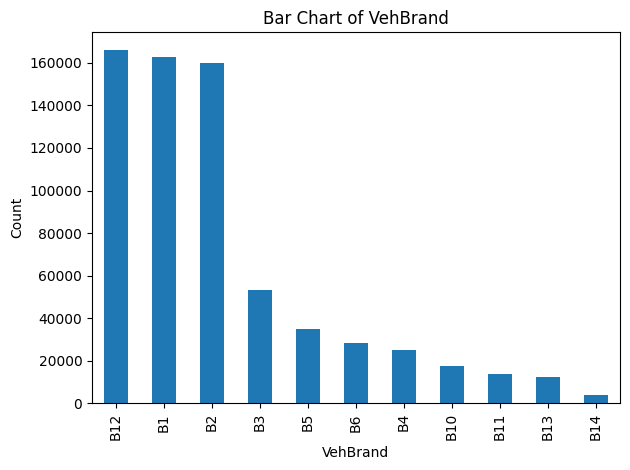

✅ Saved bar chart to: VehGas_bar_chart.png


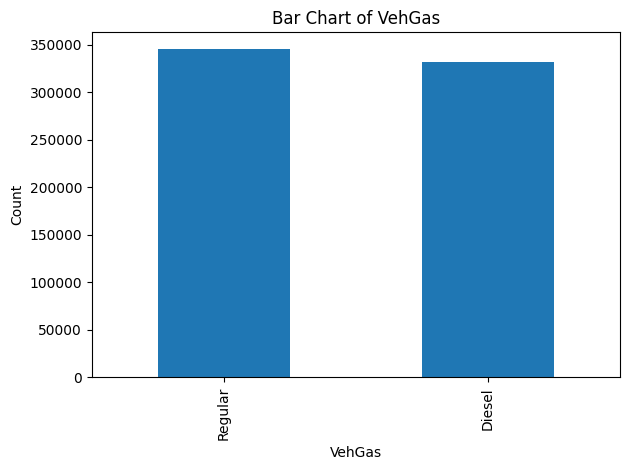

✅ Saved bar chart to: Region_bar_chart.png


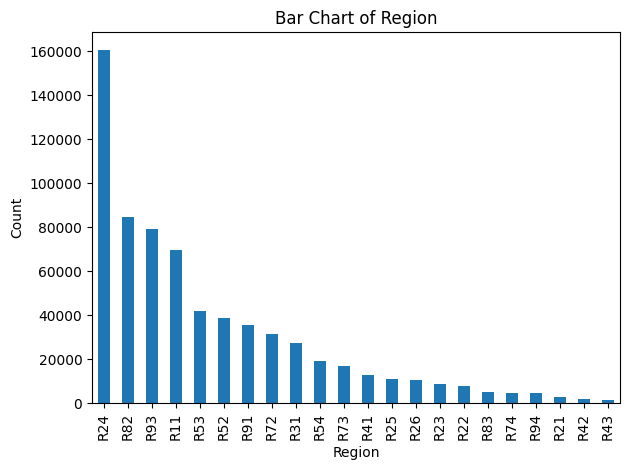

In [17]:
# These columns are known to be categorical (strings) from your dataset:
categorical_cols = ["Area", "VehBrand", "VehGas", "Region"]

# Call the function to plot bar charts for these columns
plot_categorical_bars(df_freq, categorical_cols)

The majority of insured come from area C (200k) and the least from F (25k)

The vast majority of cars around 160k each come from VehBrans B1, B2, B12. B3 has around 55k

The split between regular and diesel is approx 50:50

160k of all insured come from region R24. R24, R82, R93 and R11 account for the majority of regions. I think about 90% of all insured come from these areas

In [18]:
def prepare_data_for_modeling(df_freq, df_sev):
    df_sev_agg = df_sev.groupby('IDpol')['ClaimAmount'].sum().reset_index()
    df_sev_agg.rename(columns={'ClaimAmount': 'total_claim_amount'}, inplace=True)
    df_merged = pd.merge(df_freq, df_sev_agg, on='IDpol', how='left')
    df_merged['total_claim_amount'] = df_merged['total_claim_amount'].fillna(0)
    df_merged['target'] = 0.0
    mask = df_merged['Exposure'] > 0
    df_merged.loc[mask, 'target'] = (df_merged.loc[mask, 'total_claim_amount'] /
                                     df_merged.loc[mask, 'Exposure'])
    return df_merged


In [19]:
df_combined = prepare_data_for_modeling(df_freq, df_sev)

In [20]:
plot_histograms_freedman_diaconis(
    df_combined,
    columns=["total_claim_amount", "target"],
    clip_upper_quantile=0.99
)


✅ Saved: total_claim_amount_histogram.png
✅ Saved: target_histogram.png


In [21]:
def prepare_data_for_modeling(df_freq, df_sev):
    # Aggregate ClaimAmount by IDpol
    df_sev_agg = df_sev.groupby('IDpol', as_index=False)['ClaimAmount'].sum()
    df_sev_agg.rename(columns={'ClaimAmount': 'total_claim_amount'}, inplace=True)

    # Merge the frequency and severity dataframes
    df_merged = pd.merge(df_freq, df_sev_agg, on='IDpol', how='left')

    # Fill missing total_claim_amount with 0
    df_merged['total_claim_amount'] = df_merged['total_claim_amount'].fillna(0)

    # Initialize 'target' as float to avoid dtype issues
    df_merged['target'] = 0.0

    # Calculate 'target' where 'Exposure' is greater than 0
    mask = df_merged['Exposure'] > 0
    df_merged.loc[mask, 'target'] = (
        df_merged.loc[mask, 'total_claim_amount'] / df_merged.loc[mask, 'Exposure']
    )

    return df_merged


In [22]:
df_combined = prepare_data_for_modeling(df_freq, df_sev)

In [23]:
def plot_and_save_correlation_matrix(df, columns=None, filename="correlation_matrix.png"):
    """
    Computes and plots the Pearson correlation matrix of selected columns in the dataframe.
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataframe containing your data.
    columns : list of str or None
        List of columns to include in the correlation matrix.
        If None, all numeric columns will be used.
    filename : str
        File name to save the plot.
    """
    if columns is not None:
        corr_df = df[columns]
    else:
        corr_df = df.select_dtypes(include=np.number)

    corr_matrix = corr_df.corr(method='pearson')

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
                cbar_kws={"shrink": .8}, linewidths=.5)
    plt.title("Correlation Matrix", fontsize=14)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()
    print(f"✅ Correlation matrix saved to: {filename}")

In [24]:
plot_and_save_correlation_matrix(df_combined, filename="correlation_matrix_combined.png")


✅ Correlation matrix saved to: correlation_matrix_combined.png
